## 1. Import data
Akan digunakan Data Mall Customer Segmentation yang berasal dari kaggle.com. Dataset ini berisi data pelanggan di mall dengan fitur seperti usia, pendapatan tahunan, dan skor pengeluaran

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import os

In [3]:
os.getcwd()

'/Users/beonintermedia/Documents/Github-Rof/Artificial-Intelligence/Unsupervised Learning/Evaluasi Clustering'

In [4]:
loc = '/Users/beonintermedia/Documents/Github-Rof/Artificial-Intelligence/Unsupervised Learning/Hierarchical Clustering/Mall_Customers.csv'

In [5]:
df = pd.read_csv(loc) 

In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 2. Standarisasi
Kita akan menggunakan kolom seperti Age, Annual Income (k$), dan Spending Score (1-100) sebagai fitur untuk clustering. Pertama-tama kita perlu menstandarisasi data agar K-Means dapat bekerja dengan baik.

In [8]:
# Memilih fitur yang relevan untuk clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [9]:
# Menstandarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled[0:10]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002]])

## 3. Clustering

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42) 
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

In [13]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


## 4. Evaluasi Clustering

### 4.1 Silhoutte Scores

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
# Menentukan jumlah cluster k dan menghitung Silhouette Score
silhouette_scores = []

for k in range(2, 12):  # K-means untuk k = 2 hingga k = 11
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Menghitung Silhouette Score hanya jika k >= 2
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

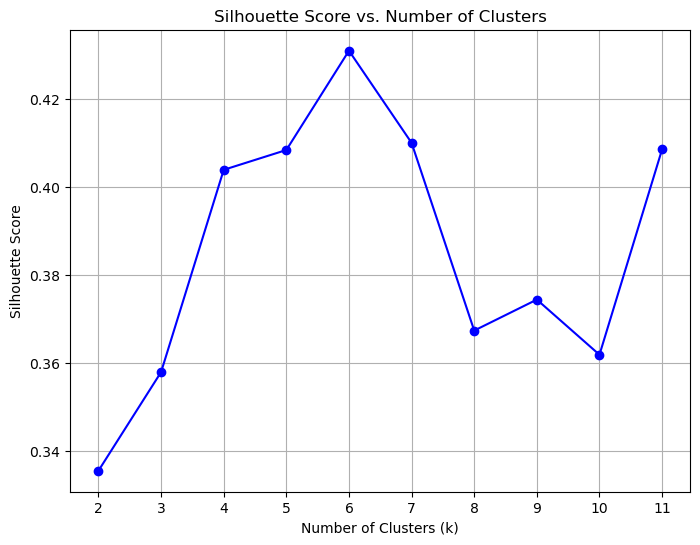

k = 2: Silhouette Score = 0.3355
k = 3: Silhouette Score = 0.3579
k = 4: Silhouette Score = 0.4040
k = 5: Silhouette Score = 0.4085
k = 6: Silhouette Score = 0.4311
k = 7: Silhouette Score = 0.4101
k = 8: Silhouette Score = 0.3674
k = 9: Silhouette Score = 0.3744
k = 10: Silhouette Score = 0.3619
k = 11: Silhouette Score = 0.4086


In [18]:
# Visualisasi hasil Silhouette Score vs Jumlah Cluster
plt.figure(figsize=(8, 6))
plt.plot(range(2, 12), silhouette_scores, marker='o', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 12))
plt.grid(True)
plt.show()

# Menampilkan hasil Silhouette Score untuk setiap k
for k, score in zip(range(2, 12), silhouette_scores):
    print(f'k = {k}: Silhouette Score = {score:.4f}')

### 4.2 All Metode

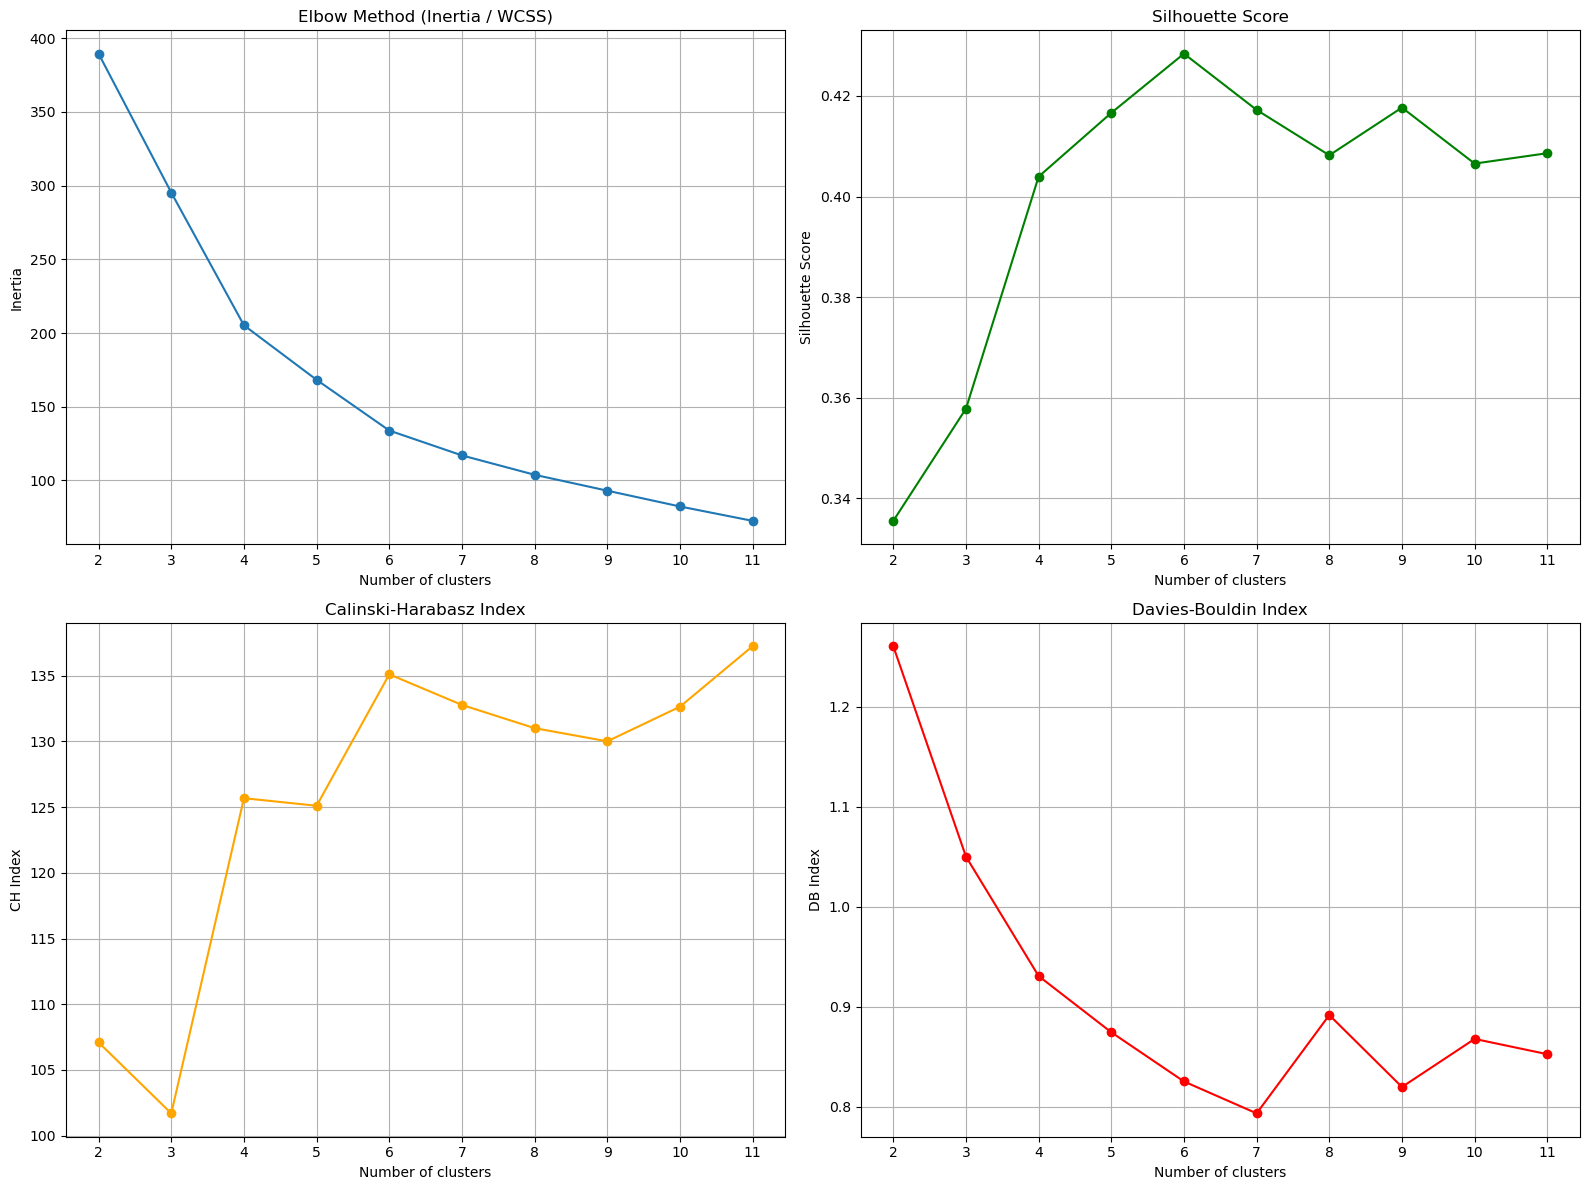

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

cluster_range = range(2, 12)

inertia_list = []
silhouette_scores = []
ch_scores = []
db_scores = []

# Looping untuk setiap jumlah cluster k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    labels = kmeans.labels_
    
    # Elbow Method (WCSS / inertia)
    inertia_list.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    
    # Calinski-Harabasz Index
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    
    # Davies-Bouldin Index
    db_scores.append(davies_bouldin_score(X_scaled, labels))

# Plotting semua grafik
plt.figure(figsize=(16, 12))

# Elbow Method
plt.subplot(2, 2, 1)
plt.plot(cluster_range, inertia_list, marker='o')
plt.title('Elbow Method (Inertia / WCSS)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)

# Silhouette Score
plt.subplot(2, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)

# Calinski-Harabasz Index
plt.subplot(2, 2, 3)
plt.plot(cluster_range, ch_scores, marker='o', color='orange')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters')
plt.ylabel('CH Index')
plt.xticks(cluster_range)
plt.grid(True)

# Davies-Bouldin Index
plt.subplot(2, 2, 4)
plt.plot(cluster_range, db_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.xticks(cluster_range)
plt.grid(True)

plt.tight_layout()
plt.show()

### Interpretasi

- Elbow Method: Cari titik “elbow” di mana penurunan inertia mulai melambat → jumlah cluster optimal.
- Silhouette Score: Semakin tinggi → cluster semakin baik.
- Calinski-Harabasz Index: Semakin tinggi → cluster semakin rapat dan terpisah jelas.
- Davies-Bouldin Index: Semakin rendah → cluster semakin baik.